## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

# Standardization
from sklearn.preprocessing import StandardScaler

# Splitting Data
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regularization
from sklearn.linear_model import Ridge

## Importing Dataset

In [ ]:
df = pd.read_csv('/content/insurance-cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis & Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,39.207025,30.657481,1.094918,13270.422265
std,14.049960,6.100714,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.681250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

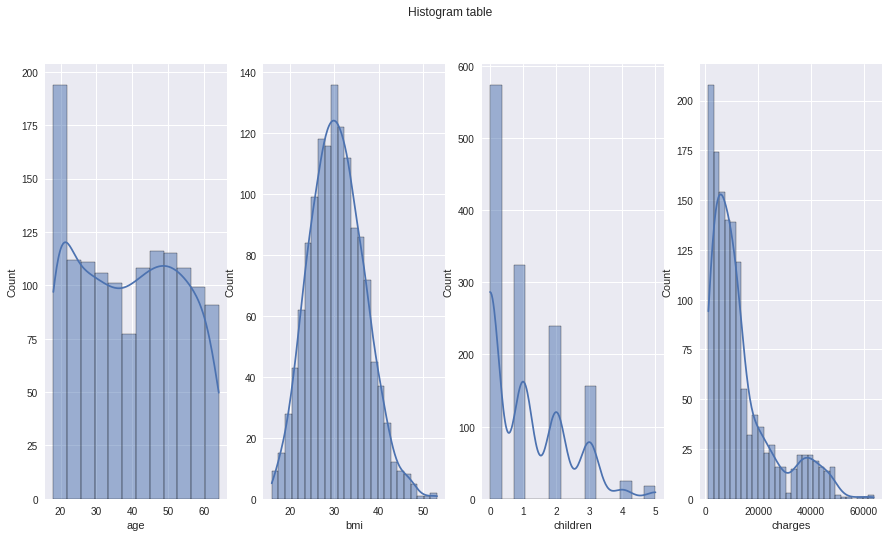

In [ ]:
features = ['age','bmi','children','charges']
fig, ax = plt.subplots(ncols=4, figsize=(15,8))
idx = 0
ax = ax.flatten()
for i,j in df[features].items():
  sns.histplot(j, ax=ax[idx], kde=True)
  idx+=1
plt.suptitle('Histogram table')
plt.show()

### Missing Values

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

- There are 2 missing values on bmi column and 2 missing values on smoker column

In [ ]:
df[df['bmi'].isnull()]

,age,sex,bmi,children,smoker,region,charges
30,22,male,NaN,0,yes,southwest,35585.5760
51,21,female,NaN,2,no,northwest,3579.8287


- For BMI missing values, we can see that we have both male and female missing values, so we need to handle this based on their gender

In [ ]:
df[df['smoker'].isnull()]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,NaN,southwest,4687.7970
53,36,male,34.43,0,NaN,southeast,37742.5757


- For smoker missing values, we can see that we have both male and female missing values, so we need to handle this based on their gender.

#### Handling Missing Values
- I am trying to handle missing values by impute mode of variable for **categorical** data and impute mean of data on **continuous** data and also we need to check whether the gender of missing values is either male or female, so we can perform the missing values handling perfectly.


#### On "bmi" Column

In [ ]:
df.groupby('sex')['bmi'].mean()

sex
female    30.372829
male      30.936230
Name: bmi, dtype: float64

In [ ]:
male_mean = df.groupby('sex')['bmi'].mean()[1]
female_mean = df.groupby('sex')['bmi'].mean()[0]

In [ ]:
df[['bmi','sex']].loc[df['bmi'].isnull()]

,bmi,sex
30,NaN,male
51,NaN,female


In [ ]:
df.loc[df['sex']=='male','bmi'] = df.loc[df['sex']=='male','bmi'].fillna(male_mean)
df.loc[df['sex']=='female','bmi'] = df.loc[df['sex']=='female','bmi'].fillna(female_mean)

#### On "smoker" column

In [ ]:
df.groupby('sex')['smoker'].agg(pd.Series.mode)

sex
female    no
male      no
Name: smoker, dtype: object

In [ ]:
male_mode = df.groupby('sex')['smoker'].agg(pd.Series.mode)[1]
female_mode = df.groupby('sex')['smoker'].agg(pd.Series.mode)[0]

In [ ]:
df.loc[df['sex']=='male','smoker'] = df.loc[df['sex']=='male','smoker'].fillna(male_mode)
df.loc[df['sex']=='female','smoker'] = df.loc[df['sex']=='female','smoker'].fillna(female_mode)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Right now, we can see that our data is clean of missing values.

### Relationship within independent variables

- Age vs BMI

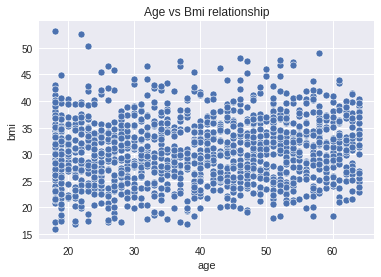

In [ ]:
sns.scatterplot(data=df,x='age',y='bmi')
plt.title("Age vs Bmi relationship")
plt.show()

> As we can see, there is no linear relation between these two independent variables, so we can say that column Age and Bmi has a weak relationship.

- Age vs Children relationship

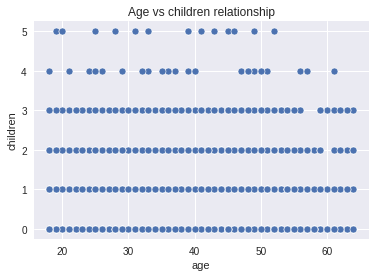

In [ ]:
sns.scatterplot(data=df,x='age',y='children', palette='deep')
plt.title("Age vs children relationship")
plt.show()

> From visualization above, we can see that the distribution of children is relatively same within the age, it means that the relationship within these two independent variables is relatively weak. In short, age doesn't determine how many children does a person have.

- Age and Sex Relationship

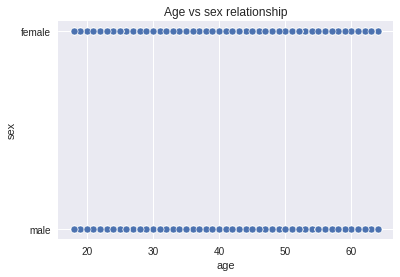

In [ ]:
sns.scatterplot(data=df,x='age',y='sex')
plt.title("Age vs sex relationship")
plt.show()

> From visualization above, we can see that the distribution of gender is relatively same within the age, it means that the relationship within these two independent variables is relatively weak. We also know that gender doesn't determined by age, since people mostly born with that gender until their current age.

- Age vs Smoker

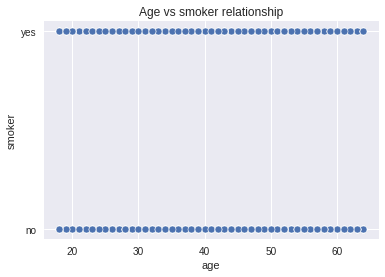

In [ ]:
sns.scatterplot(data=df,x='age',y='smoker')
plt.title("Age vs smoker relationship")
plt.show()

> As we can see above, the distribution of smoker is relatively same within the age, it means that the relationship within these two independent variables is relatively weak. We know that we can not determine whether a person is a smoker or not from their age.

- Age and Region Relationship

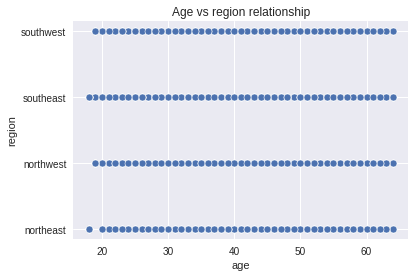

In [ ]:
sns.scatterplot(data=df,x='age',y='region')
plt.title("Age vs region relationship")
plt.show()

> As we can see above, the distribution of region is relatively same within the age, it means that the relationship within these two independent variables is relatively weak. We know that we can not determine which region a person have by their age.

- Sex and BMI Relationship

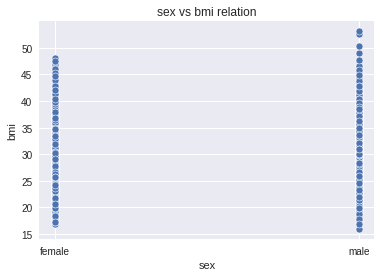

In [ ]:
sns.scatterplot(data=df, x='sex', y='bmi')
plt.title('sex vs bmi relation')
plt.show()

> As we can see above, the distribution of gender as relatively same based on its bmi, it means that we can not determine which gender a person have just by their bmi, or on the other hand, we can not determine a person's bmi by their gender

- Number of children by gender

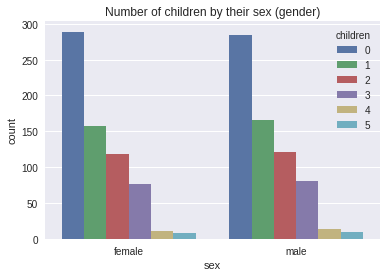

In [ ]:
sns.countplot(x='sex', hue='children', data=df)
plt.title('Number of children by their sex (gender)')
plt.show()

> As we can see above, the distribution of children by each gender is relatively same, which means that we can't determine how many children that a person have just by their gender.

- Is a person a smoker by their gender

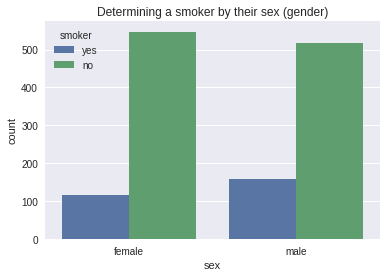

In [ ]:
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Determining a smoker by their sex (gender)')
plt.show()

> As we can see above, the amount of whether a person is a smoker or not by their sex is relatively same, but we may see some differences, it means that their relationship is not too weak. In short, gender 'male' more likely to be a smoker than 'female' (slight differences).

- Sex and region relationship

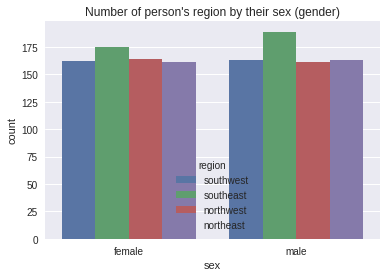

In [ ]:
sns.countplot(x='sex', hue='region', data=df)
plt.title("Number of person's region by their sex (gender)")
plt.show()

> As we can see above, the distribution of person's region between each gender is relatively same. That means that we can't determine which kind of region by their gender. Which means that the relationship between these two independent variables is weak.

- bmi vs children relationship

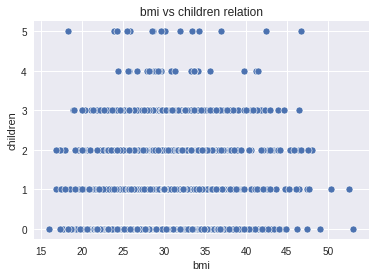

In [ ]:
sns.scatterplot(data=df, x='bmi', y='children')
plt.title('bmi vs children relation')
plt.show()

> As we can see in the picture above, the distribution is relatively same, but we can see that the distribution of children mostly in 1 children, 2 or 3. We might see some relation between these two independent but since the distribution between 1, 2, or 3 is relatively same, means that the relationship between these two independent variables is relatively weak.

- bmi and region relation

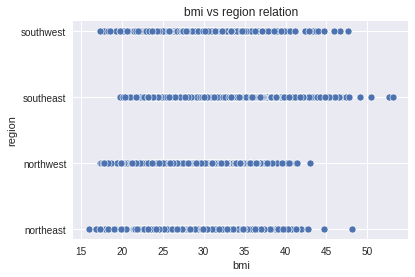

In [ ]:
sns.scatterplot(data=df, x='bmi', y='region')
plt.title('bmi vs region relation')
plt.show()

> As we can see, the distribution of bmi on each region is relatively same, which means that their relationship is relatively weak. On the other hand, it means that we can't determine which kind of region does a person has just by their bmi.

- Number of children based on their smoker status

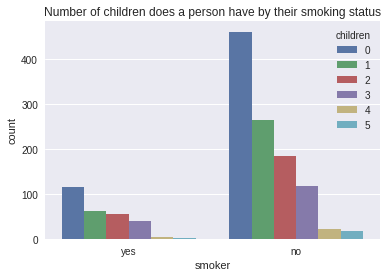

In [ ]:
sns.countplot(x='smoker', hue='children', data=df)
plt.title("Number of children does a person have by their smoking status")
plt.show()

> From the visualization above, we can see that the distribution of number of children does a person has by their smoking status is different, which means that there is a relation between smoker and children. Which means that the distribution of the number of children of a person has is relatively many when a person is not smoking.

- Number of children based on a person's region

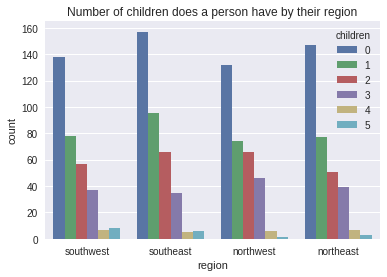

In [ ]:
sns.countplot(x='region', hue='children', data=df)
plt.title("Number of children does a person have by their region")
plt.show()

> As we can see, the distribution of the number of children is relatively same in those four regions. Which means that the relation between these two independent variables relatively weak. In short, we can't determine a region just by looking at the distribution of their amount children.

- Amount of person's region by their smoking status

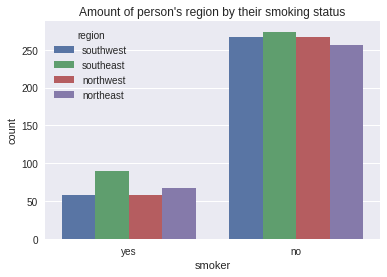

In [ ]:
sns.countplot(x='smoker', hue='region', data=df)
plt.title("Amount of person's region by their smoking status")
plt.show()

> As we can see, the distribution of amount of people's region is different, which means that there is a relation betweent these two independent variables. In short, by looking of the amount of people's region cluster, we may know whether the cluster is a smoker or not.

### Handling Categorical Data

- There are 3 columns that are categorical data, like column 'sex', 'smoker', and 'region'. In this approach, I'm trying to encode this type of data to to a numerical value so that the model could learn from these data.

In [ ]:
print('column "sex":')
print(df['sex'].unique())
print()
print('column "smoker":')
print(df['smoker'].unique())
print()
print('column "region":')
print(df['region'].unique())

column "sex":
['female' 'male']

column "smoker":
['yes' 'no']

column "region":
['southwest' 'southeast' 'northwest' 'northeast']


- For column "sex" and "smoker" we could transform each class to either 1 or 0, but for column "region" we could transform it with dummy variable (one-hot-encode methods)

#### Encoding Categorical Variables

In [ ]:
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df = pd.get_dummies(data=df)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


> For column "region" there are 4 categories, to prevent **Dummy Variable Trap** which by definition is that 1 category is being affected by other categori, for example if there is a row that is not in region_northeast, region_northwest, region_southeast, it means that region is in region_southwest. From this defintion, we need to drop 1 column, let's take region_southwest.

In [ ]:
df = df.drop(labels=['region_southwest'],axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


#### Fixing Column Position

In [ ]:
df_target = df[['charges']]
df_features = df[['age','sex','bmi','children','smoker','region_northeast',
                  'region_northwest', 'region_southeast']]

df = pd.concat([df_features, df_target], axis=1)
df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,charges
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


In [ ]:
df.shape

(1338, 9)

### Correlation between Independent variables with dependent variable

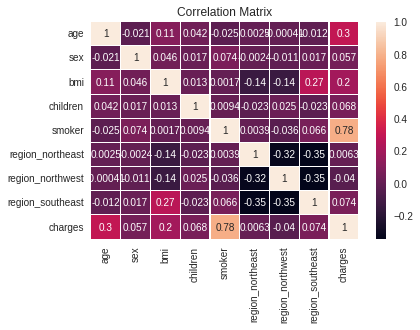

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(), annot=True, linewidth=0.1)
plt.show()

> From the visualization above we know that
- 'smoker' has the strongest correlation with 'charges' (0.78 correlation score)
- 'age' has the second strongest correlation with 'charges' (0.3 correlation score)
- 'bmi' has the third strongest correlation with 'charges' (0.2 correlation score)
- 'sex', 'children', 'region' has a weak correlation score (< 0.1)

## Splitting Dataset

In [ ]:
X = df[['age','sex','bmi','children','smoker','region_northeast',
        'region_northwest','region_southeast']]
Y = df['charges']

### Standardizing Data

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (1070, 8)
Shape of X_test = (268, 8)
Shape of y_train = (1070,)
Shape of y_test = (268,)


## Modelling 

In [ ]:
def y_predict(weight, X, intercept):
    predicted_list = []
    for i in range(len(X)):
        predicted_list.append(np.dot(weight,X[i])+intercept)
    return np.array(predicted_list)

def MSE_loss_function(Y, Y_pred):
    length = len(Y)
    sum_value = np.sum((Y_pred - Y)**2)
    return (1/length)*sum_value

def derivative_weight(X, Y, Y_pred):
    length = len(Y)
    sum_value = np.dot((Y_pred - Y), X)
    return (2/length)*sum_value

def derivative_bias(Y, Y_pred):
    length = len(Y)
    sum_value = np.sum(Y_pred - Y)
    return (2/length)*sum_value

def Gradient_Descent(X, Y):
    weight = np.random.randn(X.shape[1])
    intercept = 0
    epochs = 4000
    learning_rate = 0.01
    loss = []

    for _ in range(epochs):
        Y_pred = y_predict(weight, X, intercept)
        weight = weight - learning_rate * derivative_weight(X, Y, Y_pred)
        intercept = intercept - learning_rate * derivative_bias(Y, Y_pred)
        loss.append(MSE_loss_function(Y, Y_pred))
    
    # Plotting loss over epochs
    plt.plot(np.arange(1, epochs), loss[1:])
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")

    return weight, intercept

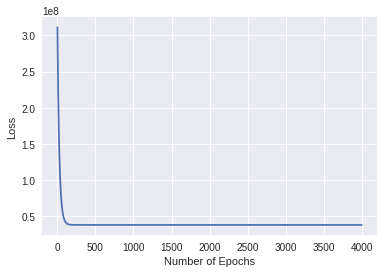

In [ ]:
W, B= Gradient_Descent(X_train,y_train)

In [ ]:
print(f'Weight : {W}')
print(f'Bias : {B}')

Weight : [3602.72776974   16.09437001 2054.19488128  492.49591771 9506.00192854
  344.60334126  185.71593863  103.04901794]
Bias : 13318.822155863518


## Prediction

In [ ]:
def prediction(X_input):
    list = []
    for i in range(len(X_input)):
        list.append(np.dot(W,X_input[i]) + B)
    return np.array(list)

In [ ]:
test_pred = prediction(X_test)

In [ ]:
y_test = y_test.reset_index(drop=True)
dataFrame_prediction = pd.DataFrame({
    'Ground Truth' : y_test,
    'Prediction' : np.round(test_pred, 2)
})

dataFrame_prediction

,Ground Truth,Prediction
0,9095.06825,8938.94
1,5272.17580,7074.74
2,29330.98315,36788.84
3,9301.89355,9457.13
4,33750.29180,26974.95
...,...,...
263,47055.53210,39128.84
264,12222.89830,11757.43
265,6067.12675,7727.51
266,63770.42801,40940.95


## Evaluation

In [ ]:
print(f'The regression equation for this model is \ny = {W[0]}*X1 + {W[1]}*X2 + {W[2]}*X3 + {W[3]}*X4 \n+ {W[4]}*X5 + {W[5]}*X6 + {W[6]}*X7 + {W[7]}*X8 + {B}')

The regression equation for this model is 
y = 3602.7277697407812*X1 + 16.094370011800468*X2 + 2054.194881284566*X3 + 492.4959177096037*X4 
+ 9506.001928542568*X5 + 344.60334126058393*X6 + 185.71593863485086*X7 + 103.04901793646859*X8 + 13318.822155863518


### Evaluation for each coefficient on each variables

- Evaluation for each coefficient on each variables can be performed with regularization techniques such as Ridge or Lasso Regression. 

> In Ridge Regression (L2) we will have a quite accurate model by keeping all of the features, this regularization is using the sum of squares of coefficient, whereas the coeffiient can be not to zeroed, but being rounded, this regularization is differentiable which means can be used to evaluate our model since our model is using Gradient Descent to optimize the Linear Regression model.

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print("Ridge Model Coefficient: ", (ridge.coef_))
print("Ridge Model Intercept: ", (ridge.intercept_))

Ridge Model Coefficient:  [3599.13169703   16.72301497 2052.35226128  492.41634602 9496.8834277
  343.89260034  184.9515172   103.28634015]
Ridge Model Intercept:  13318.846206627606


#### Comparing the coefficient with our model

In [ ]:
reg_vs_lrGD = pd.DataFrame({
    'MLR_GD_Coef': W,
    'Ridge_Coef': ridge.coef_
})
reg_vs_lrGD

,MLR_GD_Coef,Ridge_Coef
0,3602.727770,3599.131697
1,16.094370,16.723015
2,2054.194881,2052.352261
3,492.495918,492.416346
4,9506.001929,9496.883428
5,344.603341,343.892600
6,185.715939,184.951517
7,103.049018,103.286340


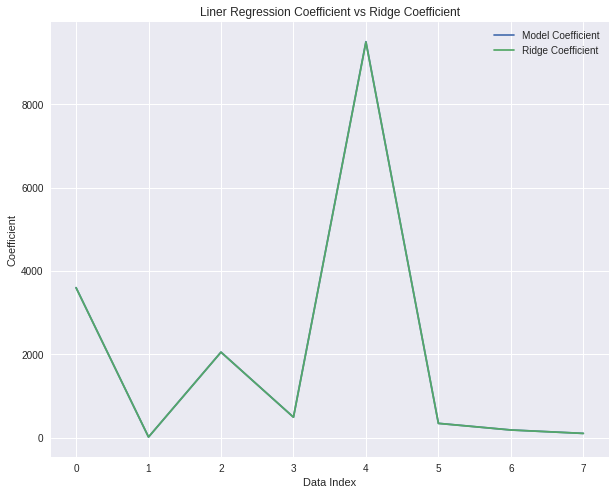

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,8), reg_vs_lrGD['MLR_GD_Coef'], label='Model Coefficient')
plt.plot(np.arange(0,8), reg_vs_lrGD['Ridge_Coef'], label = 'Ridge Coefficient')
plt.title('Liner Regression Coefficient vs Ridge Coefficient')
plt.xlabel('Data Index')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

> As we can see, its hardly to see any differences between ridge coefficient with our model coefficient, which means that our model coefficient is regularized enough, and in short it means that our model can perform well without having an overfitting problem.

### Comparing Metrics Score

In [ ]:
# Prediction on Ridge Regression
ridge_pred = ridge.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test,test_pred)
mae_ridge = mean_absolute_error(y_test, ridge_pred)
print(f'Mean Absolute Error (LinReg): {mae}')
print(f'Mean Absolute Error (Ridge): {mae_ridge}\n')

# Mean Squared Error
mse = mean_squared_error(y_test,test_pred)
mse_ridge = mean_squared_error(y_test, ridge_pred)
print(f'Mean Squared Error (LinReg): {mse}')
print(f'Mean Squared Error (Ridge): {mse_ridge}\n')

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test,test_pred))
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
print(f'Mean Squared Error (LinReg): {rmse}')
print(f'Mean Squared Error (Ridge): {rmse_ridge}\n')

# R-Squared Score
r2 = r2_score(y_test, test_pred)
r2_ridge = r2_score(y_test, ridge_pred)
print(f'R-Squared Score (LinReg): {r2}')
print(f'R-Squared Score (Ridge): {r2_ridge}\n')

Mean Absolute Error (LinReg): 4199.122731953374
Mean Absolute Error (Ridge): 4200.6923614746665

Mean Squared Error (LinReg): 33698461.13506136
Mean Squared Error (Ridge): 33706348.16034409

Mean Squared Error (LinReg): 5805.037565344548
Mean Squared Error (Ridge): 5805.716851547627

R-Squared Score (LinReg): 0.7829388954662924
R-Squared Score (Ridge): 0.782888092955979



- The Evaluation Metrics and score between these two is really close, which means that our model is regularized enough (Perform Well).

### Evaluation using Metrics

#### MAE

In [ ]:
mae = mean_absolute_error(y_test,test_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4199.122731953374


- Mean Absolute Error is a metric score by getting the average of absolute error (difference between y_test (Actual Value) and test_pred (Predicted Value), where absolute means that if the error is in negative value, we change it to positive)

#### MSE

In [ ]:
mse = mean_squared_error(y_test,test_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 33698461.13506136


- Mean Squared Error is a metric score by getting the average of error (difference between y_test (Actual Value) and test_pred (Predicted Value)), where this error will be squared before being averaged.

#### RMSE

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,test_pred))
print(f'Mean Squared Error: {rmse}')

Mean Squared Error: 5805.037565344548


- Root Mean Squared Error is a metric score by getting the average of error (difference between y_test (Actual Value) and test_pred (Predicted Value)), where this error will be squared before being averaged. The mean squared error then will be rooted to get the error score.

#### R-Squared

In [ ]:
r2 = r2_score(y_test, test_pred)
print(f'R-Squared Score: {r2}')

R-Squared Score: 0.7829388954662924


- R-squared is a metric that have equation
1 - (the sum of the differences between the observed values and the predicted ones being squared) / (the sum of residual). It check whether the actual value is correlated with predicetd value. On the other hand it means, that how much variation between actual value and predicted value

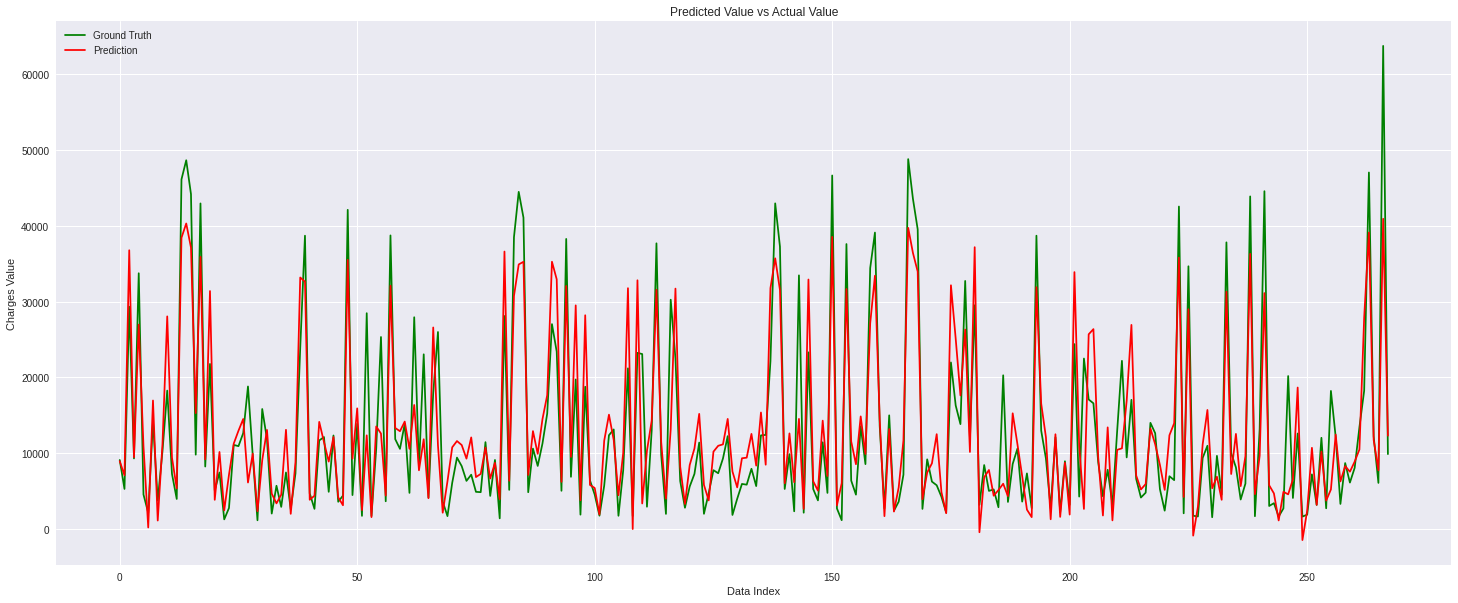

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(np.arange(0,268), dataFrame_prediction['Ground Truth'], label='Ground Truth', color='green')
plt.plot(np.arange(0,268), dataFrame_prediction['Prediction'], label = 'Prediction', color='red')
plt.title('Predicted Value vs Actual Value')
plt.xlabel('Data Index')
plt.ylabel('Charges Value')
plt.legend()
plt.show()

> As we can see above, the plotting between ground truth and prediction is relatively close, which means that our model can predict well on test data.